# Titanic - Machine Learning from Disaster

* Performed Basic Data Visialization and Data cleaning  
* Trained 2 classifiers from sci-kit learn library  
* Implemented Logistic Regression Classifier from scratch using numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

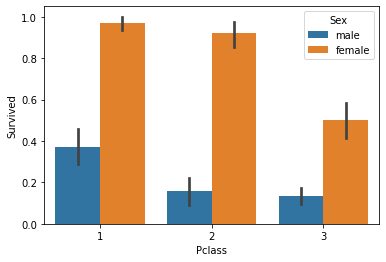

In [5]:
sns.barplot(x = 'Pclass', data = df, y = 'Survived', hue = 'Sex')

<AxesSubplot:>

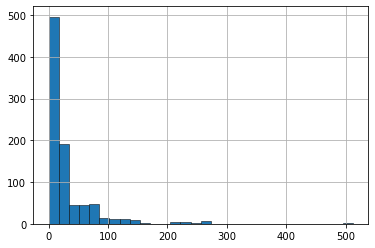

In [6]:
df['Fare'].hist(bins=30, edgecolor='black',linewidth=0.5)

**Converting Sex and Embarked to one hot encoding**

In [7]:
df.replace({'male': 1, 'female': 0}, inplace=True)

In [8]:
df = pd.concat([df,pd.get_dummies(df['Embarked'], prefix='Embarked')], axis =1)

**Checking missing values**

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [10]:
df['Embarked'].fillna("S", inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

**Remove outlier from Fare**

In [11]:
df.loc[df.Fare>512, 'Fare'] = 263

In [12]:
df = df[['Pclass','Sex','Age','Fare','SibSp','Parch','Survived','Embarked_C','Embarked_Q','Embarked_S']]
df.head()

,Pclass,Sex,Age,Fare,SibSp,Parch,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,7.2500,1,0,0,0,0,1
1,1,0,38.0,71.2833,1,0,1,1,0,0
2,3,0,26.0,7.9250,0,0,1,0,0,1
3,1,0,35.0,53.1000,1,0,1,0,0,1
4,3,1,35.0,8.0500,0,0,0,0,0,1


### Model Training

Create X, y  
Split data into training and testing data  
Scale X

In [13]:
from sklearn.model_selection import train_test_split
X = df[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked_C','Embarked_Q']]
y = df.Survived
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

**Naive Bayes Classifier**

In [15]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
predict_test = model_NB.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7877094972067039


**Stochastic Gradient Descent Classifier**

In [16]:
from sklearn.linear_model import SGDClassifier
model_SGD = SGDClassifier(loss='log')
model_SGD.fit(X_train, y_train)
predict_test = model_SGD.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.770949720670391


**Self implemented Logistic Regression Classifier**

In [21]:
def activation(z):
  return 1/(1 + np.exp(-z))

In [22]:
def gradient_descent(x, y, theta, alpha, m, h1):
    grad = np.dot((h1 - y), x) / m
    theta = theta - alpha*grad
    return theta

In [23]:
def loss(x, y, theta, m,h):
  loss1 = np.dot(np.log(h),y)
  loss2 = np.dot((np.log(1-h)), (1-y))
  loss_out = -1*(loss1+ loss2)/m
  return loss_out

In [24]:
x = x_train.values
y = y_train.values
m = x.shape[0]
bias = np.ones([m,1])
x = np.hstack((bias, x))
theta = np.zeros(x.shape[1])
y_hat = activation(np.dot(x,theta))

alpha = 0.005

In [25]:
theta_out = gradient_descent(x, y, theta, alpha, m, y_hat)
for i in range(10000):
  h1 = activation(np.dot(x,theta_out))
  theta_out = gradient_descent(x, y, theta_out, alpha, m, h1)
  loss_out = loss(x, y, theta_out, m,h1)

In [26]:
loss_out

0.5085248736613882

### Final Model

In [17]:
model_full_data = GaussianNB()
model_full_data.fit(X, y)

GaussianNB()

In [19]:
test_data = pd.read_csv('test.csv')

test_data.replace({'male': 1, 'female': 0}, inplace=True)
test_data['Age'].fillna(df['Age'].mean(), inplace=True)
test_data['Fare'].fillna(df['Fare'].mean(), inplace=True)

test_data = pd.concat([test_data,pd.get_dummies(test_data['Embarked'], prefix='Embarked')], axis =1)

test_X = test_data[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked_C','Embarked_Q']]

test_X = sc.transform(test_X)

# make predictions
test_preds = model_full_data.predict(test_X)


In [20]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': test_preds})
output.to_csv('my_submission.csv', index=False)